# **第5章 チノふたたび！画像から数字を予測しよう**


## 19　データを準備する


「手書き数字のサンプルデータ」を読み込んで、中身を確認： リスト5.1

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits

# データを読み込む
digits = load_digits()
# 中身を確認
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

| データ名 | 内容 |
| - | - |
| data | 学習用画像データ |
| target | その画像データに対応する番号 |
| target_names | そのtargetの番号が何の数字か |
| images | 画像データを8x8に並べて見やすくしたもの |
| DESCR | このデータセットの説明文 |

データフレームを読み込む： リスト5.2

In [ ]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


targetの番号がなんの数字かを確認する： リスト5.3

In [ ]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


先頭10行の画像データに対応するtargetの番号を確認する： リスト5.4

In [ ]:
for i in range(10):
    print(digits.target[i])

0
1
2
3
4
5
6
7
8
9


先頭10行のdataを画像で確認する：　リスト5.5

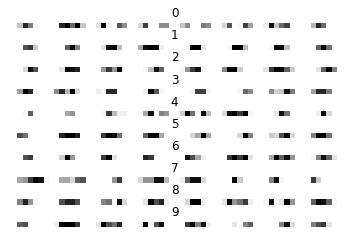

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(10):
    #　縦に10個並べる
    plt.subplot(10, 1, i + 1)
    plt.axis("off")
    plt.title(digits.target[i])
    plt.imshow(digits.data[i:i+1], cmap="Greys")
plt.show()

先頭10行のdataを8x8に変換したtargetを画像で確認する： リスト5.6

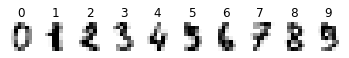

In [ ]:
for i in range(10):
    #　横に10個並べる
    plt.subplot(1, 10, i + 1)
    plt.axis("off")
    plt.title(digits.target[i])
    plt.imshow(digits.images[i], cmap="Greys")
plt.show()

## 20　学習データを準備する


データを学習用とテスト用に分割して、個数を確認： リスト5.7

In [ ]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

#　データを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("train=", len(X_train))
print("test=", len(X_test))

train= 1347
test= 450


## 21　学習させる


学習させて、正解率を確認： リスト5.8

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma=0.001)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

正解率: 99.55555555555556 %


## 22 予測させる

読み込んだ画像を描画して確認： リスト5.9

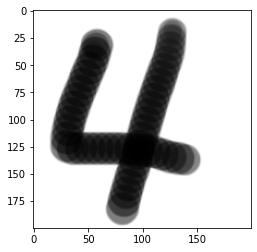

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("4.png").convert("L")

plt.imshow(image, cmap="gray")
plt.show()

8x8の画像に変換： リスト5.10

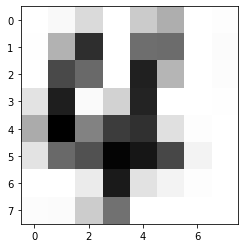

In [ ]:
image = image.resize((8, 8), Image.ANTIALIAS)
plt.imshow(image, cmap="gray")
plt.show()

8×8の画像の色の濃さを数値化して確認: リスト5.11

In [ ]:
import numpy as np
img = np.asarray(image, dtype=float)
print(img)

[[255. 249. 219. 255. 205. 178. 255. 253.]
 [254. 181.  56. 255. 117. 115. 255. 251.]
 [255.  82. 112. 255.  44. 184. 255. 252.]
 [228.  41. 250. 212.  46. 255. 255. 254.]
 [175.  12. 136.  69.  59. 225. 253. 255.]
 [228. 112.  89.  16.  33.  80. 244. 255.]
 [255. 255. 236.  37. 227. 244. 253. 255.]
 [252. 251. 206. 120. 255. 255. 255. 255.]]


0〜255を 16.0〜0.0に変換： リスト5.12

In [ ]:
img = 16 - np.floor(17*img/256)
print(img)

[[ 0.  0.  2.  0.  3.  5.  0.  0.]
 [ 0.  4. 13.  0.  9.  9.  0.  0.]
 [ 0. 11.  9.  0. 14.  4.  0.  0.]
 [ 1. 14.  0.  2. 13.  0.  0.  0.]
 [ 5. 16.  7. 12. 13.  2.  0.  0.]
 [ 1.  9. 11. 15. 14. 11.  0.  0.]
 [ 0.  0.  1. 14.  1.  0.  0.  0.]
 [ 0.  0.  3.  9.  0.  0.  0.  0.]]


2次元配列を1次元配列に変換： リスト5.13

In [ ]:
img = img.flatten()
print(img)

[ 0.  0.  2.  0.  3.  5.  0.  0.  0.  4. 13.  0.  9.  9.  0.  0.  0. 11.
  9.  0. 14.  4.  0.  0.  1. 14.  0.  2. 13.  0.  0.  0.  5. 16.  7. 12.
 13.  2.  0.  0.  1.  9. 11. 15. 14. 11.  0.  0.  0.  0.  1. 14.  1.  0.
  0.  0.  0.  0.  3.  9.  0.  0.  0.  0.]


ここで、もともとの画像データのフォーマットを確認しておく： リスト5.14

In [ ]:
print(digits.data[0:1])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


データを渡して予測： リスト5.15

In [ ]:
predict = model.predict([img])
print("予測=",predict)

予測= [4]


6.png を読み込んで予測： リスト5.16

予測= [6]


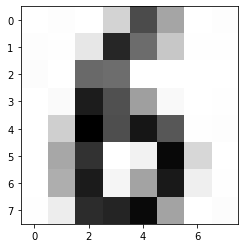

In [ ]:
image = Image.open("6.png").convert('L')
image = image.resize((8, 8), Image.ANTIALIAS)
img = np.asarray(image, dtype=float)
img = 16 - np.floor(17*img/256)
img = img.flatten()

predict = model.predict([img])
print("予測=",predict)

plt.imshow(image, cmap="gray")
plt.show()

## 23 教師なし学習を利用して、 データをイメージしよう

 「64個の説明変数を持つ学習データ」を、3個の説明変数に減らして、3D散布図で描画： リスト5.17

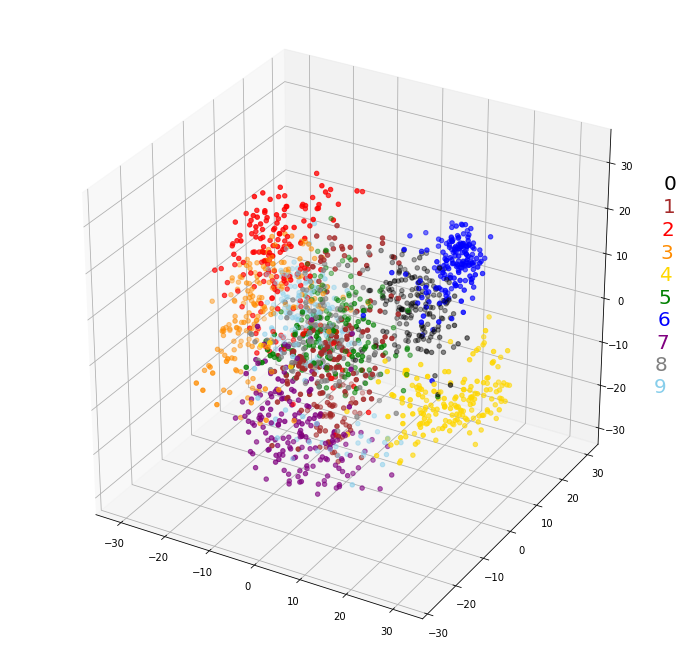

In [ ]:
from sklearn.datasets import load_digits
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
y = digits.target

# 0〜9の色名を用意する
numbercolor = ["BLACK","BROWN","RED","DARKORANGE","GOLD",
               "GREEN","BLUE","PURPLE","GRAY","SKYBLUE"]
# yの値を色名に変えて、colorsリストを作る
colors = []
for i in y:
	colors.append(numbercolor[i])

# 主成分分析で、64個の特徴量を3個へと次元を減らす
pca = decomposition.PCA(n_components=3)
features3 = pca.fit_transform(X)

# 3個へ減らしたデータ（features3)で、データフレームを作る
df = pd.DataFrame(features3)

# 3D散布図の準備
fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_subplot(projection='3d')
# 3個の特徴量をX,Y,Zにして、各点の数字に対応する色で散布図を描画
ax.scatter(df[0], df[1], df[2], color=colors)

# 数字がどの色かの見本を描画
ty = 0
for col in numbercolor:
    ax.text(50, 30, 30-ty*5, str(ty), size=20, color=col)
    ty+=1
plt.show()

視点を変えて描画: リスト5.18

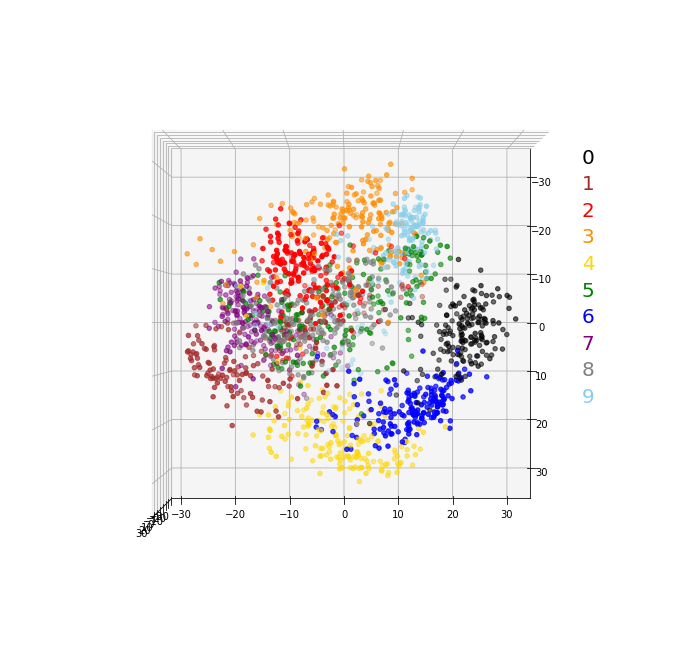

In [ ]:
#　視点を変えて描画
fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_subplot(projection='3d')
# 各点の数字に対応する色で散布図を描画
ax.scatter(df[0], df[1], df[2], color=colors)

#　数字がどの色かの見本を描画
ty = 0
for col in numbercolor:
    ax.text(-30+ty*5, 40, 30, str(ty), size=20, color=col)
    ty+=1
ax.view_init(90,0)
plt.show()